# Econometric Regression Diagnostics and Time Series Analysis with Python

In [53]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat.python import lzip   
from matplotlib import pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.filters import hp_filter
import pmdarima as pm

## Regression Diagnostics 

In [55]:
data_covid = pd.read_csv('japancovid_perday.csv')
data_covid = pd.read_csv('japancovid_perday.csv', index_col=0).dropna()
data_covid = data_covid.reset_index()
data_covid.dropna() 

,index,Date,Total cases,Requiring Inpatient Care,Discharged from hospital,to be confirmed cases,-,Deaths,Vaccines,dose1,dose2,Deaths per Day,Cases per Day,Discharged per Day
0,1,10/05/2020,718980,279404,391644,19412,11454,616,0,0,0,8.0,2254.0,10948.0
1,2,11/05/2020,722476,272044,409538,11362,11178,638,0,0,0,22.0,3496.0,17894.0
2,3,12/05/2020,729284,237452,453146,8004,11914,662,0,0,0,24.0,6808.0,43608.0
3,4,13/05/2020,731768,217672,474766,7774,11270,681,0,0,0,19.0,2484.0,21620.0
4,5,14/05/2020,737012,199594,496432,8372,10902,704,0,0,0,23.0,5244.0,21666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,575,05/12/2021,237809742,144072,235169802,86664,4002,53874,6219936,672888,1400424,0.0,14214.0,10074.0
575,576,06/12/2021,237819126,138966,235183602,87216,3864,53877,4238670,498134,914756,3.0,9384.0,13800.0
576,577,07/12/2021,237830994,137862,235196574,87768,3726,53883,3593796,397210,800722,6.0,11868.0,12972.0
577,578,08/12/2021,237846312,140622,235207752,87492,3588,53889,2772972,212566,711758,6.0,15318.0,11178.0


In [56]:
X = data_covid[['Cases per Day', 'Discharged per Day', 'Requiring Inpatient Care']]
Y = data_covid['Deaths per Day']
X = sm.add_constant(X)
res = sm.OLS(Y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Deaths per Day   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.561e+04
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:26:44   Log-Likelihood:                -3395.9
No. Observations:                 579   AIC:                             6800.
Df Residuals:                     575   BIC:                             6817.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<p align = "justify"> Looking into the various coefficients of the model, a lot of factors need to be considered when analyzing multiple regression models. The partial regression coefficient of number of cases per day is 0.0002 on the condition that the influence
of the other independent variables on the dependent variable are held constant. Deaths per Day increases by 2 units for every 10,000 unit increase in cases per day. The partial regression coefficient of the number of patients discharged from
the hospital per day is 0.0002 on the condition that the influence of the other independent variables on the dependent variable are held constant. The partial regression coefficient for the number of patients requiring inpatient care is -0.00003341 on the condition that the influence of the other independent variables on the dependent variable are held constant. The p-values, denoted by of the number of cases per day (0.000), the number of patients discharged per day (0.000), and the number of patients requiring inpatient care (0.000), are all statistically significant. Based on the p-values of these variables, the null hypothesis can be rejected. In addition, looking into the R-squared value, 0.988, 98.8% of the variation in the dependent variable (deaths per day) is explained by the independent variables.

<p align = "justify"> One way to determine the validity of the model is to assess whether or not it satisfies OLS assumptions.
The Gauss-Markov Theorem has 3 assumptions:
1. Unbiased, where the expected value of the estimator E[β1] is equal to the true value of the parameter, β1 E(εi|Xi) = 0
2. Minimum Variance in the class of all such linear unbiased estimators, or that the estimator is an efficient estimator. var(εi|Xi) = 0
3. Error covariances are zero E(εi,εj|X1,...,Xn) = 0

<p align = "justify"> With these assumptions, the OLS estimator is expected to be the best linear unbiased estimator. The OLS linear regression should possess all the characteristics listed in the assumptions above.

<p align = "justify"> Applying this to the model, E(εi|Xi) is close, but not equal to 0. The variance of the OLS linear regression model is close, but not at minimum. Moreover, referring to the computations for the standard error of the beta coefficients, the error covariances are close, but not equal to zero. In addition, there is a possible autocorrelation between the variables. A correlation of the same variables exists, given that data was obtained on successive time intervals. There is also possible
multicollinearity between these variables since it's possible that the independent variables are correlated. Based on these assumptions, biasedness exists in the model. However, on a practical note, it makes sense that the independent variables are statistically significant, given that these variables are factors to consider in predicting deaths per day.

<p align = "justify"> Overall, there are various factors to consider to understand whether or not the model is unbiased and makes sense. Other regression diagnostic tests need to be conducted to assess the validity of the model.


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
X = data_covid[['Cases per Day', 'Discharged per Day', 'Requiring Inpatient Care']]
X = sm.add_constant (X)
vif_data["feature"] = X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
print(vif_data)

                    feature        VIF
0                     const   1.318148
1             Cases per Day  28.913968
2        Discharged per Day  29.239637
3  Requiring Inpatient Care   1.116732


Given that the VIF coefficients for cases per day and discharged per day are 28.913968 and 29.239637 respectively, there is multicollinearity between these variables. Cases per day and discharged per day and highly correlated.

In [58]:
name = ["Breusch Pagan Lagrange Multiplier Statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(name, test)

[('Breusch Pagan Lagrange Multiplier Statistic', 92.78782527487395),
 ('p-value', 5.516611512057561e-20),
 ('f-value', 36.577309459061425),
 ('f p-value', 1.2049712401112679e-21)]

<p align = "justify">To interpret the presence of heteroscedasticity for the model, a null and alternate hypothesis will be formed. The null hypothesis is: Homoscedasticity is present in the model. The alternate hypothesis is: Heteroscedasticity ispresent in the model. The Breusch Pagan lagrange multiplier statistic is about 92.787825 and the corresponding p-value is 5.516611512057561e-20. Based on the Breusch Pagan test results, the p-value for the test statistic, 5.516611512057561e-20, is statistically significant. The null hypothesis is rejected on this basis. Heteroscedasticity is present in the model.


## Time-Series Analysis

In [59]:
# Initial Data Cleaning 
df = pd.read_csv('RetailDataUnited.csv')
df['Date'] = pd.to_datetime(df['WeekStarting'], errors='coerce') 
df['Product'] = df['Product'].str.upper() 
df = df.loc[:,['Date', 'Product', 'Units', 'Price']].drop_duplicates() 
df = df.pivot(index = 'Date',columns = 'Product') 
df = df.interpolate(method='polynomial', order=2) 
df 

Units                         Price                    
Product         Q           R           S     Q         R         S
Date                                                               
2019-01-01  478.0  359.000000  221.000000  1.78  1.370000  1.610000
2019-01-10  201.0  220.000000  153.382307  2.03  1.950000  1.361995
2019-01-15  246.0  127.000000  120.000000  2.09  1.510000  1.590000
2019-01-22  811.0  174.000000   92.000000  0.95  1.860000  2.100000
2019-01-29  174.0  149.000000  144.000000  1.47  1.620000  1.750000
...           ...         ...         ...   ...       ...       ...
2020-12-01  355.0  242.923574  208.872980  1.56  1.361222  1.510183
2020-12-05  428.0  197.000000  120.000000  1.28  1.390000  1.610000
2020-12-08  373.0  153.852846   94.329412  1.31  1.512401  1.651221
2020-12-15  398.0   82.000000  120.000000  1.49  1.850000  1.680000
2020-12-22  276.0  187.000000  145.000000  1.46  1.590000  1.720000

[115 rows x 6 columns]

In [60]:
data_retail = pd.read_csv('RetailDataUnited_Set.csv')
data_retail = pd.read_csv('RetailDataUnited_Set.csv', index_col=0).dropna()
data_retail = data_retail.reset_index()
data_retail.dropna()

,Date,Quantity Q,Quantity R,Quantity S,Price Q,Price R,Price S,Revenue Q,Revenue R,Revenue S,...,LN(PriceS),LN(QuantityQ),LN(QuantityR),LN(QuantityS),Log(PriceQ),Log(PriceR),Log(PriceS),Log(QuantityQ),Log(QuantityR),Log(QuantityS)
0,01/01/2019,478.00000,359.000000,221.000000,1.780000,1.370000,1.610000,850.840000,491.83000,355.810000,...,0.476234,6.169611,5.883322388,5.398162702,0.250420,0.136721,0.206826,2.679428,2.555094449,2.344392274
1,08/01/2019,452.00000,193.000000,183.000000,1.360000,1.530000,1.670000,614.720000,295.29000,305.610000,...,0.512824,6.113682,5.262690189,5.209486153,0.133539,0.184691,0.222716,2.655138,2.285557309,2.26245109
2,10/01/2019,201.00000,162.427914,165.987663,2.030000,1.519654,1.629314,408.030000,246.83425,270.446104,...,0.488159,5.303305,5.090234296,5.111913468,0.307496,0.181745,0.212005,2.303196,2.210660666,2.220075811
3,15/01/2019,246.00000,127.000000,120.000000,2.090000,1.510000,1.590000,514.140000,191.77000,190.800000,...,0.463734,5.505332,4.844187086,4.787491743,0.320146,0.178977,0.201397,2.390935,2.103803721,2.079181246
4,22/01/2019,811.00000,174.000000,92.000000,0.950000,1.860000,2.100000,770.450000,323.64000,193.200000,...,0.741937,6.698268,5.159055299,4.521788577,-0.022276,0.269513,0.322219,2.909021,2.240549248,1.963787827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,24/11/2020,277.00000,247.000000,344.000000,1.640000,1.560000,1.400000,454.280000,385.32000,481.600000,...,0.336472,5.624018,5.509388337,5.840641657,0.214844,0.193125,0.146128,2.442480,2.392696953,2.536558443
114,01/12/2020,355.00000,240.575914,117.000000,1.560000,1.248257,1.740000,553.800000,300.30045,203.580000,...,0.553885,5.872118,5.483035691,4.762173935,0.193125,0.096304,0.240549,2.550228,2.381252145,2.068185862
115,05/12/2020,366.80724,197.000000,50.289321,1.394915,1.390000,1.827752,511.665101,273.83000,91.916424,...,0.603087,5.904836,5.283203729,3.917792756,0.144548,0.143015,0.261917,2.564438,2.294466226,1.701475775
116,08/12/2020,373.00000,159.000000,58.985806,1.310000,1.700000,1.791377,488.630000,270.30000,105.665814,...,0.582985,5.921578,5.068904202,4.077296838,0.117271,0.230449,0.253187,2.571709,2.201397124,1.770747518


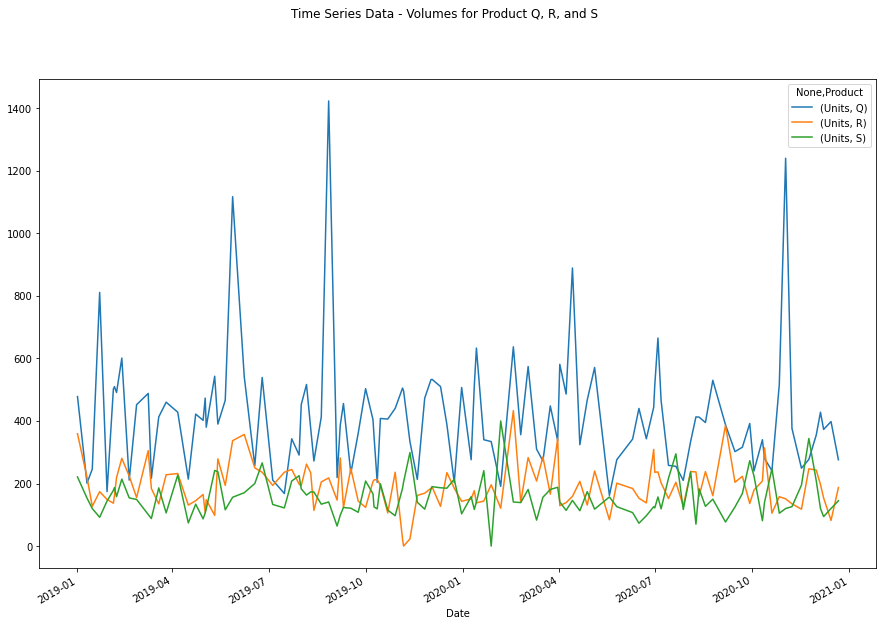

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


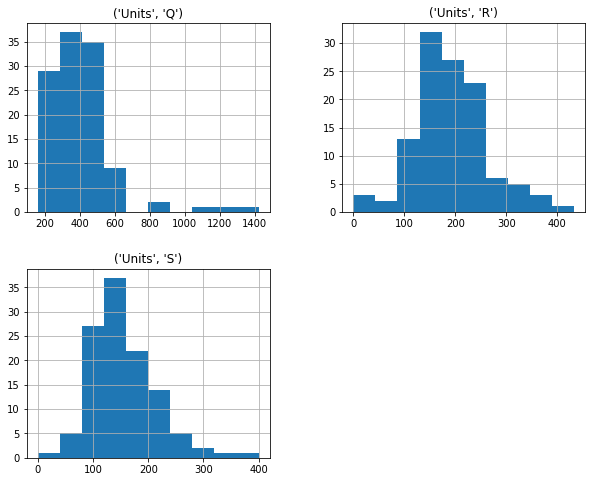

In [61]:
# Line plots of time series
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Time Series Data - Volumes for Product Q, R, and S')
df.iloc[:,:3].plot(ax=ax)
plt.show()
#Historgram
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Histogram')
df.iloc[:,:3].hist(ax=ax)
plt.show()

In [62]:
## Constructing a Regression Model

In [63]:
import statsmodels.api as sm 
x = df.iloc[:,-3:] 
y = df.iloc[:,0] 
x = sm.add_constant(x) 
modelres = sm.OLS(y, x).fit() 
print(modelres.summary()) 

                            OLS Regression Results                            
Dep. Variable:         ('Units', 'Q')   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     17.59
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           2.07e-09
Time:                        15:26:46   Log-Likelihood:                -745.17
No. Observations:                 115   AIC:                             1498.
Df Residuals:                     111   BIC:                             1509.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            693.0175    117.632      5.

<p align = "justify"> Looking into the various coefficients of the model, a lot of factors need to be considered when analyzing multiple regression models. The partial regression coefficient of number of ('Price', 'Q') is -319.7453 on the condition that the influence of the other independent variables on the dependent variable are held constant. One unit increase in price will decrease the quantity demanded of product Q by about 319 units. The partial regression coefficient of ('Price', 'R') is 82.9298 on the condition that the influence of the other independent variables on the dependent variable are held constant. One unit increase in the price of product R will increase the quantity demanded of product Q by about 83 units. The partial regression coefficient of ('Price', 'S') is 53.8924 on the condition that the influence of the other independent variables on the dependent variable are held constant. One unit increase in the price of product S will increase the quantity demanded of product Q by about 54 units. The p-value, denoted by $P>|t|$ of LN (Price Q), 0.000, is statistically significant. Based solely on the p-value of this variable, the null hypothesis can be rejected. The other p-values are not statistically significant, given that they are above the 0.05 confidence interval. The R-squared value is 0.322. 32.2% of the change in Quantity Q can be attributed to the independent variables.This is atyipical for time series models.

<p align = justify> One way to determine the validity of the model is to assess whether or not it satisfies OLS assumptions.

<p align = "justify"> The Gauss-Markov Theorem has 3 assumptions: 

1. Unbiased, where the expected value of the estimator E[β1] is equal to the true value of the parameter, β1
E(εi|Xi) = 0
2. Minimum Variance in the class of all such linear unbiased estimators, or that the estimator is an
efficient estimator.
var(εi|Xi) = 0
3. Error covariances are zero
E(εi,εj|X1,...,Xn) = 0 

With these assumptions, the OLS estimator is expected to be the best linear unbiased estimator. The OLS linear regression should possess all the characteristics listed in the assumptions above.

<p align = "justify"> Applying this to the model in (a), E(εi|Xi) is close, but not equal to 0. The variance of the OLS linear regression model is close, but not at minimum. Moreover, referring to the computations for the standard error of the beta coefficients, the error covariances are close, but not equal to zero. In addition, there is a possible autocorrelation between the variables. A correlation of the same variables exists, given that data was obtained on successive time intervals. There is also possible multicollinearity between these variables since it's possible that the independent variables are correlated. Based on these assumptions, biasedness exists in the model. However, on a practical note, it makes sense that the independent variables are statistically significant, given that cross price elasticities measure the price elasticitites of competitor companies.

<p align = "justify">  Overall, there are various factors to consider to understand whether or not the model is unbiased and makes sense. Other regression diagnostic tests need to be conducted to assert the validity of the model.

In [64]:
## Breusch Godfrey test 

In [65]:
import statsmodels.stats.diagnostic as dg
dg.acorr_breusch_godfrey(modelres, nlags=7)

(5.975141410607656, 0.5426549566553106, 0.8142503524206817, 0.5774625015798123)

To interpret the presence of autocorrelation, a null and alternate hypothesis will be formed. The null hypothesis $(H_{0})$ is: Autocorrelation does not exist in the model. The alternate hypothesis $(H_{A})$ is: Autocorrelation exists in the model. For this model, the test statistic is about 5.975141410607656 and the corresponding p-value is about 0.5426549566553106. Based on the Breusch Godfrey test results, the p-value for the test statistic, 0.5426549566553106, is not statistically significant. We fail to reject the null hypothesis on this basis. Autocorrelation is notpresent in the model. 

In [66]:
## Durbin Watson Test

In [67]:
residuals = np.array(modelres.resid)
residuals

array([ 153.74852704,  -78.04882073,   10.33725853,  154.31700978,
       -277.64991561,   46.59262181,   41.40167121,  -25.67164966,
        219.78624308,  -77.27720647,  -85.73649783,   88.46669654,
        -38.43285272,  -96.67395632,    8.57086471,  -92.05713384,
          2.12742468,  -85.65171506, -193.32750229,  -68.66956917,
         33.88733291,  102.16595454,  179.59949327,    3.93101722,
        461.0896799 ,   63.27443332, -139.19796434,  101.04711109,
         46.03341587, -393.85852521, -205.60436016,   44.01487001,
        -23.04682706,  118.33922832,   62.15864009, -234.55571926,
         49.31863371,  788.60073234, -101.09147953,  140.6392797 ,
        143.43382049, -234.8709283 ,  -48.75212601,  206.02780876,
         72.18669503,  -19.66993592, -241.99547876,   88.03863358,
        -33.74084618,  -94.31198386,  117.63210215,  114.40054458,
        -80.34527548,  -69.51913686,  117.47058734,  101.27971638,
         69.80561454,   31.36638357,   70.74164352,  110.85955

In [68]:
x = df.iloc[:,-3:] 
y = df.iloc[:,0] 
x = sm.add_constant(x)
beta = np.linalg.inv (x.T.astype(float)@x.astype(float))@(x.T.astype(float)@y.astype(float))
beta

array([ 693.01754828, -319.74533655,   82.92979528,   53.89242497])

In [69]:
yhat = np.sum(beta.T.astype(float)*x.astype(float), axis = 1)
eps_hat = np.array((y.T.astype(float) - yhat.T.astype(float)))
eps_hat

array([ 153.74852704,  -78.04882073,   10.33725853,  154.31700978,
       -277.64991561,   46.59262181,   41.40167121,  -25.67164966,
        219.78624308,  -77.27720647,  -85.73649783,   88.46669654,
        -38.43285272,  -96.67395632,    8.57086471,  -92.05713384,
          2.12742468,  -85.65171506, -193.32750229,  -68.66956917,
         33.88733291,  102.16595454,  179.59949327,    3.93101722,
        461.0896799 ,   63.27443332, -139.19796434,  101.04711109,
         46.03341587, -393.85852521, -205.60436016,   44.01487001,
        -23.04682706,  118.33922832,   62.15864009, -234.55571926,
         49.31863371,  788.60073234, -101.09147953,  140.6392797 ,
        143.43382049, -234.8709283 ,  -48.75212601,  206.02780876,
         72.18669503,  -19.66993592, -241.99547876,   88.03863358,
        -33.74084618,  -94.31198386,  117.63210215,  114.40054458,
        -80.34527548,  -69.51913686,  117.47058734,  101.27971638,
         69.80561454,   31.36638357,   70.74164352,  110.85955

In [70]:
resid_2 = np.array([-78.04882073,   10.33725853,  154.31700978,
       -277.64991561,   46.59262181,   41.40167121,  -25.67164966,
        219.78624308,  -77.27720647,  -85.73649783,   88.46669654,
        -38.43285272,  -96.67395632,    8.57086471,  -92.05713384,
          2.12742468,  -85.65171506, -193.32750229,  -68.66956917,
         33.88733291,  102.16595454,  179.59949327,    3.93101722,
        461.0896799 ,   63.27443332, -139.19796434,  101.04711109,
         46.03341587, -393.85852521, -205.60436016,   44.01487001,
        -23.04682706,  118.33922832,   62.15864009, -234.55571926,
         49.31863371,  788.60073234, -101.09147953,  140.6392797 ,
        143.43382049, -234.8709283 ,  -48.75212601,  206.02780876,
         72.18669503,  -19.66993592, -241.99547876,   88.03863358,
        -33.74084618,  -94.31198386,  117.63210215,  114.40054458,
        -80.34527548,  -69.51913686,  117.47058734,  101.27971638,
         69.80561454,   31.36638357,   70.74164352,  110.85955274,
         50.9485613 ,  -52.13774765,   85.82145239,   51.361405  ,
       -227.3691428 ,   41.73397348, -183.70669584,  106.12569815,
        -18.45650865,  270.63052615,  -68.90503665,   57.43171605,
         80.80064802,  -73.32768051,  140.64879706,  -56.3233186 ,
        231.28821896,  -44.4491256 ,    4.43780802,   96.68067727,
       -300.39155672, -239.67873734, -132.4873671 ,  -68.24671789,
        -93.23766516,   17.73519772,   81.09433133,  187.75306191,
         19.79588793,  -59.67351469,  -25.39099646,  -78.48318211,
        -46.92363183,  -37.14974116,  -85.94744183,  -93.77346312,
        -64.95122702,  -13.37603829, -108.75908011, -116.69245851,
       -125.08360094,  -44.21491228,   -2.81287084, -163.97377562,
        -92.98076458,   -8.89182887,  623.56398726,   -0.95586456,
         -1.44648784,  -96.45507194,  -33.48812595,  -57.78273714,
       -115.5625731 ,  -62.55639205, -174.74270237])
resid_2

array([ -78.04882073,   10.33725853,  154.31700978, -277.64991561,
         46.59262181,   41.40167121,  -25.67164966,  219.78624308,
        -77.27720647,  -85.73649783,   88.46669654,  -38.43285272,
        -96.67395632,    8.57086471,  -92.05713384,    2.12742468,
        -85.65171506, -193.32750229,  -68.66956917,   33.88733291,
        102.16595454,  179.59949327,    3.93101722,  461.0896799 ,
         63.27443332, -139.19796434,  101.04711109,   46.03341587,
       -393.85852521, -205.60436016,   44.01487001,  -23.04682706,
        118.33922832,   62.15864009, -234.55571926,   49.31863371,
        788.60073234, -101.09147953,  140.6392797 ,  143.43382049,
       -234.8709283 ,  -48.75212601,  206.02780876,   72.18669503,
        -19.66993592, -241.99547876,   88.03863358,  -33.74084618,
        -94.31198386,  117.63210215,  114.40054458,  -80.34527548,
        -69.51913686,  117.47058734,  101.27971638,   69.80561454,
         31.36638357,   70.74164352,  110.85955274,   50.94856

In [71]:
resid_1 = np.array([153.74852704,  -78.04882073,   10.33725853,  154.31700978,
       -277.64991561,   46.59262181,   41.40167121,  -25.67164966,
        219.78624308,  -77.27720647,  -85.73649783,   88.46669654,
        -38.43285272,  -96.67395632,    8.57086471,  -92.05713384,
          2.12742468,  -85.65171506, -193.32750229,  -68.66956917,
         33.88733291,  102.16595454,  179.59949327,    3.93101722,
        461.0896799 ,   63.27443332, -139.19796434,  101.04711109,
         46.03341587, -393.85852521, -205.60436016,   44.01487001,
        -23.04682706,  118.33922832,   62.15864009, -234.55571926,
         49.31863371,  788.60073234, -101.09147953,  140.6392797 ,
        143.43382049, -234.8709283 ,  -48.75212601,  206.02780876,
         72.18669503,  -19.66993592, -241.99547876,   88.03863358,
        -33.74084618,  -94.31198386,  117.63210215,  114.40054458,
        -80.34527548,  -69.51913686,  117.47058734,  101.27971638,
         69.80561454,   31.36638357,   70.74164352,  110.85955274,
         50.9485613 ,  -52.13774765,   85.82145239,   51.361405  ,
       -227.3691428 ,   41.73397348, -183.70669584,  106.12569815,
        -18.45650865,  270.63052615,  -68.90503665,   57.43171605,
         80.80064802,  -73.32768051,  140.64879706,  -56.3233186 ,
        231.28821896,  -44.4491256 ,    4.43780802,   96.68067727,
       -300.39155672, -239.67873734, -132.4873671 ,  -68.24671789,
        -93.23766516,   17.73519772,   81.09433133,  187.75306191,
         19.79588793,  -59.67351469,  -25.39099646,  -78.48318211,
        -46.92363183,  -37.14974116,  -85.94744183,  -93.77346312,
        -64.95122702,  -13.37603829, -108.75908011, -116.69245851,
       -125.08360094,  -44.21491228,   -2.81287084, -163.97377562,
        -92.98076458,   -8.89182887,  623.56398726,   -0.95586456,
         -1.44648784,  -96.45507194,  -33.48812595,  -57.78273714,
       -115.5625731 ,  -62.55639205])
resid_1

array([ 153.74852704,  -78.04882073,   10.33725853,  154.31700978,
       -277.64991561,   46.59262181,   41.40167121,  -25.67164966,
        219.78624308,  -77.27720647,  -85.73649783,   88.46669654,
        -38.43285272,  -96.67395632,    8.57086471,  -92.05713384,
          2.12742468,  -85.65171506, -193.32750229,  -68.66956917,
         33.88733291,  102.16595454,  179.59949327,    3.93101722,
        461.0896799 ,   63.27443332, -139.19796434,  101.04711109,
         46.03341587, -393.85852521, -205.60436016,   44.01487001,
        -23.04682706,  118.33922832,   62.15864009, -234.55571926,
         49.31863371,  788.60073234, -101.09147953,  140.6392797 ,
        143.43382049, -234.8709283 ,  -48.75212601,  206.02780876,
         72.18669503,  -19.66993592, -241.99547876,   88.03863358,
        -33.74084618,  -94.31198386,  117.63210215,  114.40054458,
        -80.34527548,  -69.51913686,  117.47058734,  101.27971638,
         69.80561454,   31.36638357,   70.74164352,  110.85955

In [72]:
diff_resid = resid_2 - resid_1
diff_resid

array([-2.31797348e+02,  8.83860793e+01,  1.43979751e+02, -4.31966925e+02,
        3.24242537e+02, -5.19095060e+00, -6.70733209e+01,  2.45457893e+02,
       -2.97063450e+02, -8.45929136e+00,  1.74203194e+02, -1.26899549e+02,
       -5.82411036e+01,  1.05244821e+02, -1.00627999e+02,  9.41845585e+01,
       -8.77791397e+01, -1.07675787e+02,  1.24657933e+02,  1.02556902e+02,
        6.82786216e+01,  7.74335387e+01, -1.75668476e+02,  4.57158663e+02,
       -3.97815247e+02, -2.02472398e+02,  2.40245075e+02, -5.50136952e+01,
       -4.39891941e+02,  1.88254165e+02,  2.49619230e+02, -6.70616971e+01,
        1.41386055e+02, -5.61805882e+01, -2.96714359e+02,  2.83874353e+02,
        7.39282099e+02, -8.89692212e+02,  2.41730759e+02,  2.79454079e+00,
       -3.78304749e+02,  1.86118802e+02,  2.54779935e+02, -1.33841114e+02,
       -9.18566309e+01, -2.22325543e+02,  3.30034112e+02, -1.21779480e+02,
       -6.05711377e+01,  2.11944086e+02, -3.23155757e+00, -1.94745820e+02,
        1.08261386e+01,  

In [73]:
ssq_diffresid = np.sum(diff_resid**2)
ssq_diffresid

5573622.51061788

In [74]:
ssq_resid = np.sum(residuals**2)
ssq_resid

2860515.2055869154

In [75]:
## Final Answer for the Durbin Watson Statistic of Model A Assumption 1

In [76]:
ssq_diffresid/ssq_resid

1.9484680590866827

Based on the Durbin-Watson Statistic, there is little to no autocorrelation between the variables.

In [77]:
snew = pd.read_csv('RetailDataUnited_Seasonal.csv')
snew['Date'] = pd.to_datetime(snew['Date']) 
snew = snew.set_index('Date') 
snew

,Quantity Q
Date,
2019-01-01,478.00000
2019-01-08,452.00000
2019-01-10,201.00000
2019-01-15,246.00000
2019-01-22,811.00000
...,...
2020-12-01,355.00000
2020-12-05,366.80724
2020-12-08,373.00000


In [78]:
## Seasnal Decomposition

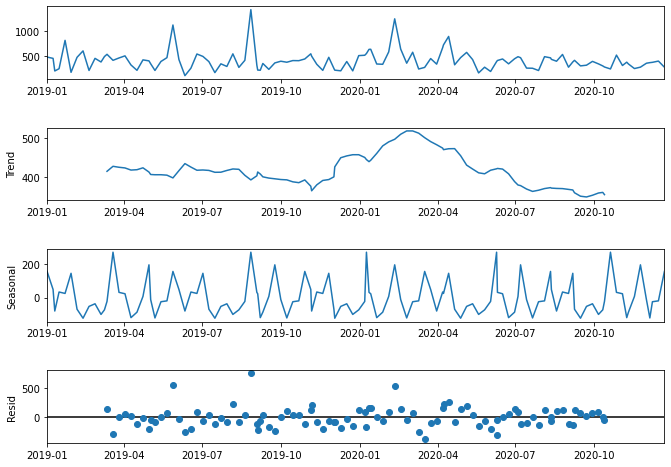

In [79]:
decomposition = seasonal_decompose(snew, period=24) 
fig = decomposition.plot() 
fig.set_size_inches((10, 7)) 
plt.show() 

Based on the seasonal decomposition model, there is a positive trend in the dataset. There is seasonality in the data.

In [80]:
## Autocorrelation Plots

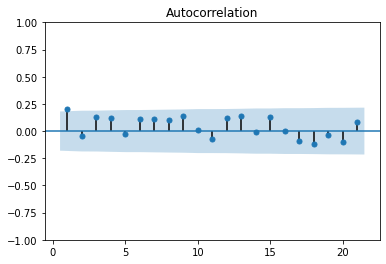

In [97]:
fig, ax = plt.subplots() 
plot_acf (data_retail['Revenue Q'],lags=21, zero=False, ax=ax)
plt.show()

Based on this model, the MA order is 1 given that the plot only shows 1 significant spike.

In [82]:
## Partial Autocorrelation Plots

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


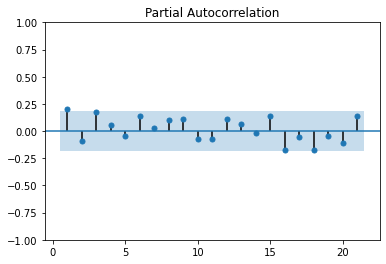

In [96]:
fig, ax = plt.subplots() 
plot_pacf (data_retail['Revenue Q'],lags=21, zero=False, ax=ax)
plt.show()

Based on this model, there needs to 21 lagged values. There was a spike at lag 21.

In [84]:
## Augmented Dickey Fuller Test

In [85]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('RetailDataUnited_Seasonal.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.255521
p-value: 0.000000
Critical Values:
	1%: -3.486
	5%: -2.886
	10%: -2.580


To interpret the stationarity of the model, a null and alternate hypothesis will be formed. The null hypothesis $(H_0)$ is: Stationarity doesn't exist in the model. The alternate hypothesis $(H_A)$ is: Staionarity exists in the model. Based on the p-value of the ADF statistic, the null hypothesis can be rejected. Stationarity exists in the model.

Seasonal ARIMA = SARIMA
$$ \text{SARIMA}(p, d, q)(P, D, Q)_S $$
   

*   Non-seasonal orders
>*   p: autoregressive order
>*   d: differencing order
>*   q: moving average order
 

*  Seasonal orders
>*  P: seasonal autoregressive order
>*  D: seasonal differencing order
>*  Q: seasonal moving average order
>*   S: Number of time steps per cycle



- The SARIMA model
    - ARIMA(2, 0, 1) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + m_1 \epsilon_{t-1} + \epsilon_t $$
    - SARIMA $(0,0,0)(2, 0, 1)_{7}$ model:
$$ y_t = a_7 y_{t-7} + a_{14} y_{t-14} + m_y \epsilon_{t-7} + \epsilon_t $$

- Seasonal differencing
    - Subtract the time series value of one season ago
$$ \Delta y_t = y_t - y_{t-S} $$

In [86]:
sdata = pd.read_csv('RetailDataUnited_Seasonal.csv', index_col=0)
sdata

,Quantity Q
Date,
2019-01-01,478.00000
2019-01-08,452.00000
2019-01-10,201.00000
2019-01-15,246.00000
2019-01-22,811.00000
...,...
2020-12-01,355.00000
2020-12-05,366.80724
2020-12-08,373.00000


In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(sdata,order=(0, 0, 1), seasonal_order=(0,0,0,12)) 
res = model.fit(disp=False) 
print(res.summary()) 

                               SARIMAX Results                                
Dep. Variable:             Quantity Q   No. Observations:                  121
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -873.490
Date:                Fri, 17 Jun 2022   AIC                           1750.980
Time:                        15:26:48   BIC                           1756.572
Sample:                             0   HQIC                          1753.251
                                - 121                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6428      0.075      8.548      0.000       0.495       0.790
sigma2      1.086e+05   1.25e+04      8.716      0.000    8.42e+04    1.33e+05
Ljung-Box (L1) (Q):                  27.97   Jarque-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Based on the results of this model, both coefficients are statistically significant. Looking into the Ljung-Box coefficient and p-value, the null hypothesis that the errors are white noise can be rejected. Another statistic analyze is the Jarque-Bera. Given that its p-value is 0, the null hypothesis can be rejected. The residuals are not normally distributed.

In [88]:
ssdata = pd.read_csv('RetailDataUnited_Seasonal.csv', index_col=0, parse_dates=True)
ssdata

,Quantity Q
Date,
2019-01-01,478.00000
2019-01-08,452.00000
2019-01-10,201.00000
2019-01-15,246.00000
2019-01-22,811.00000
...,...
2020-12-01,355.00000
2020-12-05,366.80724
2020-12-08,373.00000


In [89]:
import pmdarima as pm
autoarima = pm.auto_arima(ssdata) 
autoarima.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  121
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -806.575
Date:                Fri, 17 Jun 2022   AIC                           1619.151
Time:                        15:26:49   BIC                           1627.538
Sample:                             0   HQIC                          1622.557
                                - 121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    408.4429     30.090     13.574      0.000     349.468     467.418
ma.L1          0.1986      0.090      2.214      0.027       0.023       0.374
sigma2      3.608e+04   2828.681     12.757      0.000    3.05e+04    4.16e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               464.94
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             2.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Based on the results of this model, both coefficients are statistically significant. Looking into the Ljung-Box coefficient and p-value, the null hypothesis that the errors are white noise can be rejected. Another statistic analyze is the Jarque-Bera. Given that its p-value is 0, the null hypothesis can be rejected. The residuals are not normally distributed.